In [100]:
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn import ensemble
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
import re
import nltk
from wordcloud import WordCloud


In [101]:
df_tweet = pd.read_csv("Tweet.csv")

In [102]:
df_tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3717964 entries, 0 to 3717963
Data columns (total 7 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   tweet_id     int64 
 1   writer       object
 2   post_date    int64 
 3   body         object
 4   comment_num  int64 
 5   retweet_num  int64 
 6   like_num     int64 
dtypes: int64(5), object(2)
memory usage: 198.6+ MB


In [103]:
df_tweet.head()

,tweet_id,writer,post_date,body,comment_num,retweet_num,like_num
0,550441509175443456,VisualStockRSRC,1420070457,"lx21 made $10,008 on $AAPL -Check it out! htt...",0,0,1
1,550441672312512512,KeralaGuy77,1420070496,Insanity of today weirdo massive selling. $aap...,0,0,0
2,550441732014223360,DozenStocks,1420070510,S&P100 #Stocks Performance $HD $LOW $SBUX $TGT...,0,0,0
3,550442977802207232,ShowDreamCar,1420070807,$GM $TSLA: Volkswagen Pushes 2014 Record Recal...,0,0,1
4,550443807834402816,i_Know_First,1420071005,Swing Trading: Up To 8.91% Return In 14 Days h...,0,0,1


In [104]:
df_company_tweet = pd.read_csv("Company_Tweet.csv")

In [105]:
df_company_tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4336445 entries, 0 to 4336444
Data columns (total 2 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   tweet_id       int64 
 1   ticker_symbol  object
dtypes: int64(1), object(1)
memory usage: 66.2+ MB


In [106]:
df_company_tweet.head()

,tweet_id,ticker_symbol
0,550803612197457920,AAPL
1,550803610825928706,AAPL
2,550803225113157632,AAPL
3,550802957370159104,AAPL
4,550802855129382912,AAPL


In [107]:
tweets = pd.merge(df_company_tweet,df_tweet,on= "tweet_id", how = "inner")

In [108]:
tweets.head()

,tweet_id,ticker_symbol,writer,post_date,body,comment_num,retweet_num,like_num
0,550803612197457920,AAPL,SentiQuant,1420156789,#TOPTICKERTWEETS $AAPL $IMRS $BABA $EBAY $AMZN...,0,0,1
1,550803612197457920,AMZN,SentiQuant,1420156789,#TOPTICKERTWEETS $AAPL $IMRS $BABA $EBAY $AMZN...,0,0,1
2,550803610825928706,AAPL,SentiQuant,1420156788,#SENTISHIFTUP $K $FB $GOOGL $GS $GOLD $T $AAPL...,0,0,1
3,550803610825928706,GOOGL,SentiQuant,1420156788,#SENTISHIFTUP $K $FB $GOOGL $GS $GOLD $T $AAPL...,0,0,1
4,550803610825928706,AMZN,SentiQuant,1420156788,#SENTISHIFTUP $K $FB $GOOGL $GS $GOLD $T $AAPL...,0,0,1


In [109]:
def datasetInfo(dataset):
    print(f" Dataset Information and type \n {dataset.info()}")
    print("--------------------------------------------------------\n\n Data Types: ")
    print(dataset.dtypes)
    print("--------------------------------------------------------\n\n Rows and Columns: ")
    print(dataset.shape)
    print("--------------------------------------------------------\n\n Column Names: ")
    print(dataset.columns)
    print("--------------------------------------------------------\n\n Null Values: ")
    print(dataset.apply(lambda x: sum(x.isnull()) / len(dataset)))
    print("--------------------------------------------------------\n\n Unique Values: ")
    print(dataset.nunique())
    print("--------------------------------------------------------\n\n Describe: ")
    print(dataset.describe())

In [110]:
datasetInfo(tweets)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4336445 entries, 0 to 4336444
Data columns (total 8 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   tweet_id       int64 
 1   ticker_symbol  object
 2   writer         object
 3   post_date      int64 
 4   body           object
 5   comment_num    int64 
 6   retweet_num    int64 
 7   like_num       int64 
dtypes: int64(5), object(3)
memory usage: 297.8+ MB
 Dataset Information and type 
 None
--------------------------------------------------------

 Data Types: 
tweet_id          int64
ticker_symbol    object
writer           object
post_date         int64
body             object
comment_num       int64
retweet_num       int64
like_num          int64
dtype: object
--------------------------------------------------------

 Rows and Columns: 
(4336445, 8)
--------------------------------------------------------

 Column Names: 
Index(['tweet_id', 'ticker_symbol', 'writer', 'post_date', 'body',
       'comment_num

After Merging Remove the dataframes that do not have ticker_symbols

In [111]:
tweets.dropna(inplace = True)

Convert our post_date time in seconds to date_time

In [112]:
tweets['post_date'] = pd.to_datetime(tweets["post_date"],utc = False , unit = 's',).dt.normalize()
tweets.head()

,tweet_id,ticker_symbol,writer,post_date,body,comment_num,retweet_num,like_num
0,550803612197457920,AAPL,SentiQuant,2015-01-01,#TOPTICKERTWEETS $AAPL $IMRS $BABA $EBAY $AMZN...,0,0,1
1,550803612197457920,AMZN,SentiQuant,2015-01-01,#TOPTICKERTWEETS $AAPL $IMRS $BABA $EBAY $AMZN...,0,0,1
2,550803610825928706,AAPL,SentiQuant,2015-01-01,#SENTISHIFTUP $K $FB $GOOGL $GS $GOLD $T $AAPL...,0,0,1
3,550803610825928706,GOOGL,SentiQuant,2015-01-01,#SENTISHIFTUP $K $FB $GOOGL $GS $GOLD $T $AAPL...,0,0,1
4,550803610825928706,AMZN,SentiQuant,2015-01-01,#SENTISHIFTUP $K $FB $GOOGL $GS $GOLD $T $AAPL...,0,0,1


We need our a training set and a testing set for the prediction of Neutral or Opinionated Tweets

In [113]:
tweets.sort_values(by = "comment_num" , ascending  = False, inplace = True)
tweets


,tweet_id,ticker_symbol,writer,post_date,body,comment_num,retweet_num,like_num
3786974,1014983757252780033,TSLA,lopezlinette,2018-07-05,"I’d just like to point out that right now, rig...",631,369,0
4112626,1118989675257978880,TSLA,GerberKawasaki,2019-04-18,"If a Tesla saves you $200 a month on gas, you ...",567,0,0
4306536,1199424478536753155,TSLA,AlexSibila,2019-11-26,~Tesla feature request thread~Feel free to rep...,563,48,662
2823018,885933344487342082,AMZN,internet_dust,2017-07-14,"""I sell books."" versus ""I sell whatever the fu...",496,0,0
4182686,1138975188127834112,TSLA,TeslaNY,2019-06-13,“I think it's basically financially insane to ...,442,0,0
...,...,...,...,...,...,...,...,...
1488123,1060565704389378055,AAPL,ScottSegen,2018-11-08,Mark Zuckerberg turns down UK parliament reque...,0,0,1
1488124,1060565704389378055,GOOGL,ScottSegen,2018-11-08,Mark Zuckerberg turns down UK parliament reque...,0,0,1
1488125,1060566279818366977,AAPL,jordanladz,2018-11-08,Get audible updates with this new application....,0,0,0
1488126,1060566346763849735,AAPL,CompoundFreedom,2018-11-08,Apple Opens First Store in Thailand Saturday h...,0,0,0


## First Find the sum of all the activities in the tweet post

In [114]:
tweets["tweet_activity"] = tweets["comment_num"] + tweets["like_num"] + tweets["retweet_num"]
tweets

,tweet_id,ticker_symbol,writer,post_date,body,comment_num,retweet_num,like_num,tweet_activity
3786974,1014983757252780033,TSLA,lopezlinette,2018-07-05,"I’d just like to point out that right now, rig...",631,369,0,1000
4112626,1118989675257978880,TSLA,GerberKawasaki,2019-04-18,"If a Tesla saves you $200 a month on gas, you ...",567,0,0,567
4306536,1199424478536753155,TSLA,AlexSibila,2019-11-26,~Tesla feature request thread~Feel free to rep...,563,48,662,1273
2823018,885933344487342082,AMZN,internet_dust,2017-07-14,"""I sell books."" versus ""I sell whatever the fu...",496,0,0,496
4182686,1138975188127834112,TSLA,TeslaNY,2019-06-13,“I think it's basically financially insane to ...,442,0,0,442
...,...,...,...,...,...,...,...,...,...
1488123,1060565704389378055,AAPL,ScottSegen,2018-11-08,Mark Zuckerberg turns down UK parliament reque...,0,0,1,1
1488124,1060565704389378055,GOOGL,ScottSegen,2018-11-08,Mark Zuckerberg turns down UK parliament reque...,0,0,1,1
1488125,1060566279818366977,AAPL,jordanladz,2018-11-08,Get audible updates with this new application....,0,0,0,0
1488126,1060566346763849735,AAPL,CompoundFreedom,2018-11-08,Apple Opens First Store in Thailand Saturday h...,0,0,0,0


## Filter Tweets that are >= 50 activities

In [115]:
filterTweets = tweets.loc[tweets["tweet_activity"] > 50]

In [116]:
filterTweets.head()

,tweet_id,ticker_symbol,writer,post_date,body,comment_num,retweet_num,like_num,tweet_activity
3786974,1014983757252780033,TSLA,lopezlinette,2018-07-05,"I’d just like to point out that right now, rig...",631,369,0,1000
4112626,1118989675257978880,TSLA,GerberKawasaki,2019-04-18,"If a Tesla saves you $200 a month on gas, you ...",567,0,0,567
4306536,1199424478536753155,TSLA,AlexSibila,2019-11-26,~Tesla feature request thread~Feel free to rep...,563,48,662,1273
2823018,885933344487342082,AMZN,internet_dust,2017-07-14,"""I sell books."" versus ""I sell whatever the fu...",496,0,0,496
4182686,1138975188127834112,TSLA,TeslaNY,2019-06-13,“I think it's basically financially insane to ...,442,0,0,442


In [117]:
datasetInfo(filterTweets)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41625 entries, 3786974 to 1488017
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   tweet_id        41625 non-null  int64         
 1   ticker_symbol   41625 non-null  object        
 2   writer          41625 non-null  object        
 3   post_date       41625 non-null  datetime64[ns]
 4   body            41625 non-null  object        
 5   comment_num     41625 non-null  int64         
 6   retweet_num     41625 non-null  int64         
 7   like_num        41625 non-null  int64         
 8   tweet_activity  41625 non-null  int64         
dtypes: datetime64[ns](1), int64(5), object(3)
memory usage: 3.2+ MB
 Dataset Information and type 
 None
--------------------------------------------------------

 Data Types: 
tweet_id                   int64
ticker_symbol             object
writer                    object
post_date         datetime64[ns]
bo

### Data Cleaning and Tokenization of text body

In [118]:
import pandas as pd
import re
from nltk.corpus import stopwords

def clean_dataframe_text(df, column):
    
    # Convert text to lowercase
    
    # Remove any non-alphanumeric characters and replace them with spaces
    df[column] = df[column].apply(lambda x: re.sub(r"(\w+)'d", lambda m: 'would' if m.group(1) in ['he', 'she', 'it', 'that'] else 'had', x))
    
    # Replace 's with 'is' or 'has'
    df[column] = df[column].apply(lambda x: re.sub(r"(\w+)'s", lambda m: 'is' if m.group(1) in ['he', 'she', 'it'] else 'has', x))
    
    # Remove any non-alphanumeric characters and replace them with spaces
    df[column] = df[column].apply(lambda x: re.sub(r'[^\w\s]', ' ', x))
    
    # Replace any consecutive whitespace characters with a single space
    df[column] = df[column].apply(lambda x: re.sub(r'\s+', ' ', x))
    
    df[column] = df[column].apply(lambda x: re.sub(r'[^\w\s]', ' ', x))
    
    # Replace any consecutive whitespace characters with a single space
    df[column] = df[column].apply(lambda x: re.sub(r'\s+', ' ', x))
    
    df[column] = df[column].str.lower()
    
    
    
    return df

In [119]:
clean_dataframe_text(filterTweets,"body")

C:\Users\eric2\AppData\Local\Temp\ipykernel_49892\543705496.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column].apply(lambda x: re.sub(r"(\w+)'d", lambda m: 'would' if m.group(1) in ['he', 'she', 'it', 'that'] else 'had', x))
C:\Users\eric2\AppData\Local\Temp\ipykernel_49892\543705496.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column].apply(lambda x: re.sub(r"(\w+)'s", lambda m: 'is' if m.group(1) in ['he', 'she', 'it'] else 'has', x))
C:\Users\eric2\AppDat

,tweet_id,ticker_symbol,writer,post_date,body,comment_num,retweet_num,like_num,tweet_activity
3786974,1014983757252780033,TSLA,lopezlinette,2018-07-05,i d just like to point out that right now righ...,631,369,0,1000
4112626,1118989675257978880,TSLA,GerberKawasaki,2019-04-18,if a tesla saves you 200 a month on gas you ow...,567,0,0,567
4306536,1199424478536753155,TSLA,AlexSibila,2019-11-26,tesla feature request thread feel free to rep...,563,48,662,1273
2823018,885933344487342082,AMZN,internet_dust,2017-07-14,i sell books versus i sell whatever the fuck ...,496,0,0,496
4182686,1138975188127834112,TSLA,TeslaNY,2019-06-13,i think is basically financially insane to bu...,442,0,0,442
...,...,...,...,...,...,...,...,...,...
1498488,1063566557677146112,AAPL,financialbuzz,2018-11-16,watch us report live from the floor of the nys...,0,126,80,206
1498489,1063566683720175616,AAPL,financialbuzz,2018-11-16,watch us report live from the floor of the nys...,0,86,62,148
1498490,1063566957956349952,AAPL,financialbuzz,2018-11-16,watch us report live from the floor of the nys...,0,117,41,158
1482004,1058502476406632448,AAPL,financialbuzz,2018-11-02,watch us report live from the floor of the nys...,0,155,0,155


In [120]:
# filterTweets["body"].apply(lambda x : clean_tweet(x))
# filterTweets["body"].apply(lambda x : x.translate(str.maketrans('', '' , string.punctuation)))
# filterTweets["body"]
# filterTweets["body"].apply(lambda x : nltk.word_tokenize(x))

In [121]:
filterTweets["body"].head()

3786974    i d just like to point out that right now righ...
4112626    if a tesla saves you 200 a month on gas you ow...
4306536     tesla feature request thread feel free to rep...
2823018     i sell books versus i sell whatever the fuck ...
4182686     i think is basically financially insane to bu...
Name: body, dtype: object

### Tweet EDA

In [122]:
filterTweets["writer"].describe()


count           41625
unique           2797
top       TESLAcharts
freq             2212
Name: writer, dtype: object

### Writer Data Exploration

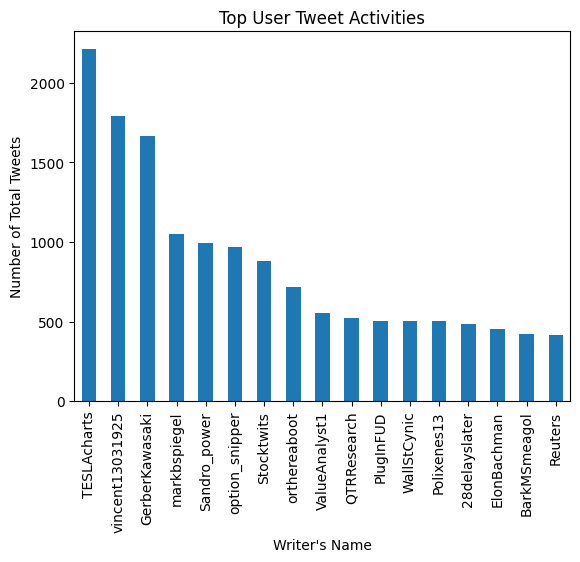

In [123]:

counts = filterTweets["writer"].value_counts()
countsFilter = counts[counts > 400]
countsFilter.plot(kind="bar")

plt.title("Top User Tweet Activities")
plt.ylabel("Number of Total Tweets")
plt.xlabel("Writer's Name")
plt.show()

Graph above shows the top writers that are active and have >100 posts

<AxesSubplot: ylabel='ticker_symbol'>

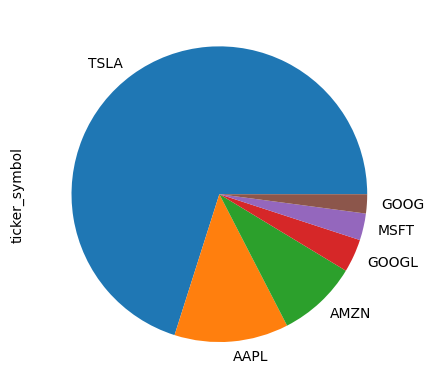

In [124]:

counts = filterTweets["ticker_symbol"].value_counts()
counts.plot(kind="pie")

Notice that there are more TSLA tweets in the dataset.

### Active Tweets dates

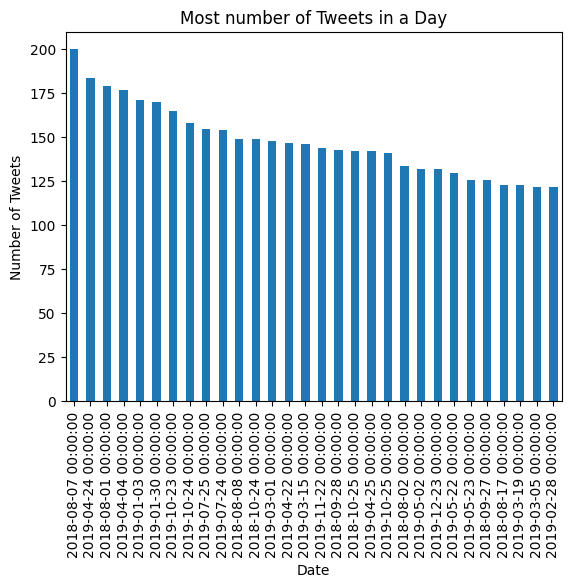

In [125]:
count = filterTweets["post_date"].value_counts()
count
filterCounts = count[count > 120]
filterCounts.plot(kind = "bar")
plt.title("Most number of Tweets in a Day")
plt.ylabel("Number of Tweets")
plt.xlabel("Date")
plt.show()

Above bar graphs shows the highest tweets in the respective days

### Word Cloud of Tweets

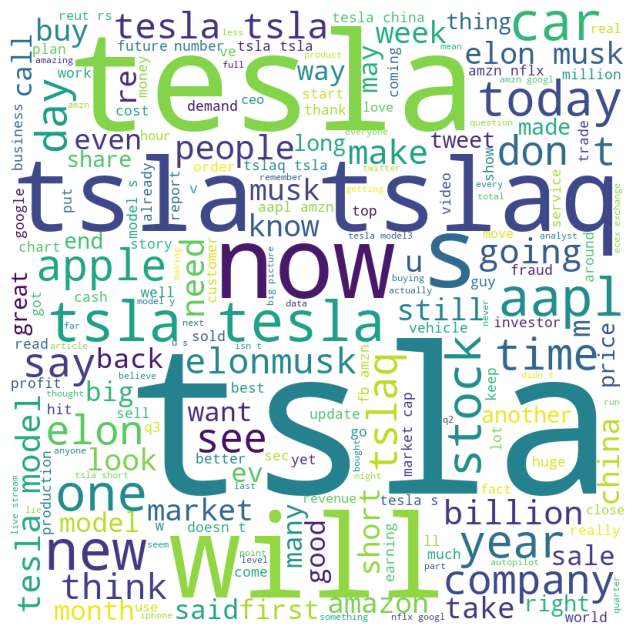

In [126]:
text = " ".join(filterTweets["body"])
wordcloud = WordCloud(width = 800, height = 800, background_color='white', max_words = 200)
wordcloud.generate(text)

plt.figure(figsize=(8, 8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

From the word cloud we can tell that TSLA/TESLA and AAPL are common tweets in Twitter

# Polarity Detection

### Import TextBlob

### Import Sentiment Analyser from NLTK

In [127]:
from nltk.sentiment import SentimentIntensityAnalyzer

In [128]:
analyser = SentimentIntensityAnalyzer()

In [129]:
def getSentiment(body):
    analyser = SentimentIntensityAnalyzer()
    
    assert body is not None
    sentimentAnalysis = analyser.polarity_scores(body)
    score = sentimentAnalysis['compound']
    
    if (score >= 0.05):
        return "Positive"
    elif (score < 0.05 and score > -0.05):
        return "Neutral"
    elif (score <= -0.05):
        return "Negative"
    
    print(score)
    

In [130]:
filterTweets['sentiment'] = filterTweets['body'].apply(lambda x : getSentiment(x))

filterTweets


C:\Users\eric2\AppData\Local\Temp\ipykernel_49892\1991431580.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filterTweets['sentiment'] = filterTweets['body'].apply(lambda x : getSentiment(x))


,tweet_id,ticker_symbol,writer,post_date,body,comment_num,retweet_num,like_num,tweet_activity,sentiment
3786974,1014983757252780033,TSLA,lopezlinette,2018-07-05,i d just like to point out that right now righ...,631,369,0,1000,Positive
4112626,1118989675257978880,TSLA,GerberKawasaki,2019-04-18,if a tesla saves you 200 a month on gas you ow...,567,0,0,567,Neutral
4306536,1199424478536753155,TSLA,AlexSibila,2019-11-26,tesla feature request thread feel free to rep...,563,48,662,1273,Positive
2823018,885933344487342082,AMZN,internet_dust,2017-07-14,i sell books versus i sell whatever the fuck ...,496,0,0,496,Negative
4182686,1138975188127834112,TSLA,TeslaNY,2019-06-13,i think is basically financially insane to bu...,442,0,0,442,Positive
...,...,...,...,...,...,...,...,...,...,...
1498488,1063566557677146112,AAPL,financialbuzz,2018-11-16,watch us report live from the floor of the nys...,0,126,80,206,Neutral
1498489,1063566683720175616,AAPL,financialbuzz,2018-11-16,watch us report live from the floor of the nys...,0,86,62,148,Neutral
1498490,1063566957956349952,AAPL,financialbuzz,2018-11-16,watch us report live from the floor of the nys...,0,117,41,158,Neutral
1482004,1058502476406632448,AAPL,financialbuzz,2018-11-02,watch us report live from the floor of the nys...,0,155,0,155,Positive


### Testing out TextBlob Sentimental Analysis

In [131]:
from textblob import TextBlob

In [132]:
# Function to use TextBlob (Sentimental Analysis [Objectivity & Polarity])

def add_sentiment_scores_blob(df, text_column, polarity_threshold = 0.0 , subjectivity_threshold = 0.5):
    # Compute polarity and subjectivity scores for each row in the specified text column
    scores = df[text_column].apply(lambda x: TextBlob(x).sentiment)
    
    # Add two new columns to the DataFrame for the polarity and subjectivity scores
    df['blob_polarity'] = scores.apply(lambda x: x.polarity)
    df['blob_subjectivity'] = scores.apply(lambda x: x.subjectivity)
    
    # Convert polarity score to class (positive, neutral, or negative) based on the specified threshold
    df['blob_polarity'] = df['blob_polarity'].apply(lambda x: 'Positive' if x > polarity_threshold else 'Negative' if x < -polarity_threshold else 'Neutral')
    
    # Convert subjectivity score to class (subjective or objective) based on the specified threshold
    df['blob_subjectivity'] = df['blob_subjectivity'].apply(lambda x: 'Subjective' if x > subjectivity_threshold else 'Objective')
    
    return df
    
    

In [133]:
add_sentiment_scores_blob(filterTweets,"body", 0.0, 0.5)

C:\Users\eric2\AppData\Local\Temp\ipykernel_49892\2951990553.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['blob_polarity'] = scores.apply(lambda x: x.polarity)
C:\Users\eric2\AppData\Local\Temp\ipykernel_49892\2951990553.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['blob_subjectivity'] = scores.apply(lambda x: x.subjectivity)
C:\Users\eric2\AppData\Local\Temp\ipykernel_49892\2951990553.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try 

,tweet_id,ticker_symbol,writer,post_date,body,comment_num,retweet_num,like_num,tweet_activity,sentiment,blob_polarity,blob_subjectivity
3786974,1014983757252780033,TSLA,lopezlinette,2018-07-05,i d just like to point out that right now righ...,631,369,0,1000,Positive,Positive,Objective
4112626,1118989675257978880,TSLA,GerberKawasaki,2019-04-18,if a tesla saves you 200 a month on gas you ow...,567,0,0,567,Neutral,Positive,Objective
4306536,1199424478536753155,TSLA,AlexSibila,2019-11-26,tesla feature request thread feel free to rep...,563,48,662,1273,Positive,Positive,Subjective
2823018,885933344487342082,AMZN,internet_dust,2017-07-14,i sell books versus i sell whatever the fuck ...,496,0,0,496,Negative,Negative,Subjective
4182686,1138975188127834112,TSLA,TeslaNY,2019-06-13,i think is basically financially insane to bu...,442,0,0,442,Positive,Negative,Objective
...,...,...,...,...,...,...,...,...,...,...,...,...
1498488,1063566557677146112,AAPL,financialbuzz,2018-11-16,watch us report live from the floor of the nys...,0,126,80,206,Neutral,Positive,Objective
1498489,1063566683720175616,AAPL,financialbuzz,2018-11-16,watch us report live from the floor of the nys...,0,86,62,148,Neutral,Positive,Objective
1498490,1063566957956349952,AAPL,financialbuzz,2018-11-16,watch us report live from the floor of the nys...,0,117,41,158,Neutral,Positive,Objective
1482004,1058502476406632448,AAPL,financialbuzz,2018-11-02,watch us report live from the floor of the nys...,0,155,0,155,Positive,Positive,Objective


### Convert Positive, Negative and Neutral to numeral labels

In [134]:
sentiment_map = {"Positive": 1, "Negative": 0, "Neutral": 2}

In [135]:
filterTweets["sentiment"].replace(sentiment_map, inplace = True)
filterTweets["blob_polarity"].replace(sentiment_map, inplace = True)

C:\Users\eric2\AppData\Local\Temp\ipykernel_49892\3903232632.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filterTweets["sentiment"].replace(sentiment_map, inplace = True)
C:\Users\eric2\AppData\Local\Temp\ipykernel_49892\3903232632.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filterTweets["blob_polarity"].replace(sentiment_map, inplace = True)


### Splitting up data for Prediction using ensemble machine learning models For NLTK.Sentiment Analysis

In [136]:
X = filterTweets["body"] #["ticker_symbol","writer" , "body"]
y = filterTweets["sentiment"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=0)

In [137]:
X_train.info()
X_train.head()

<class 'pandas.core.series.Series'>
Int64Index: 31218 entries, 4261783 to 1436407
Series name: body
Non-Null Count  Dtype 
--------------  ----- 
31218 non-null  object
dtypes: object(1)
memory usage: 487.8+ KB


4261783    has more patheticthat tesla attempted to deliv...
4111496    sources tsla pares loses amid reports from tes...
1573703    big earnings week amzn aapl amd fb msft baba t...
3954714    1 in this thread i chart puzzling ihs markit r...
1581966    watch us report live from the floor of the nys...
Name: body, dtype: object

In [138]:
X_test.info()
X_test.head()

<class 'pandas.core.series.Series'>
Int64Index: 10407 entries, 4076760 to 3742364
Series name: body
Non-Null Count  Dtype 
--------------  ----- 
10407 non-null  object
dtypes: object(1)
memory usage: 162.6+ KB


4076760    great write up on the potential recovery for b...
4226495     tsla competition is killing it dealer i pace ...
4321661    raise your hand if you agreed to let tsla beta...
2494776    1 good interview with the brilliant p_ferragu ...
4056663                              really classy move tsla
Name: body, dtype: object

In [139]:
y_train.info()
y_train.head()

<class 'pandas.core.series.Series'>
Int64Index: 31218 entries, 4261783 to 1436407
Series name: sentiment
Non-Null Count  Dtype
--------------  -----
31218 non-null  int64
dtypes: int64(1)
memory usage: 487.8 KB


4261783    1
4111496    0
1573703    2
3954714    2
1581966    2
Name: sentiment, dtype: int64

In [140]:
y_test.info()
y_test.head()


<class 'pandas.core.series.Series'>
Int64Index: 10407 entries, 4076760 to 3742364
Series name: sentiment
Non-Null Count  Dtype
--------------  -----
10407 non-null  int64
dtypes: int64(1)
memory usage: 162.6 KB


4076760    1
4226495    0
4321661    1
2494776    1
4056663    1
Name: sentiment, dtype: int64

In [141]:
filterTweets["sentiment"].value_counts()

1    19473
0    11384
2    10768
Name: sentiment, dtype: int64


### Separating Neutral Sentiments and Opinionated Sentiments

In [142]:
opinionatedTweets = filterTweets.loc[filterTweets["sentiment"]!= 2]
opinionatedTweets.head()

,tweet_id,ticker_symbol,writer,post_date,body,comment_num,retweet_num,like_num,tweet_activity,sentiment,blob_polarity,blob_subjectivity
3786974,1014983757252780033,TSLA,lopezlinette,2018-07-05,i d just like to point out that right now righ...,631,369,0,1000,1,1,Objective
4306536,1199424478536753155,TSLA,AlexSibila,2019-11-26,tesla feature request thread feel free to rep...,563,48,662,1273,1,1,Subjective
2823018,885933344487342082,AMZN,internet_dust,2017-07-14,i sell books versus i sell whatever the fuck ...,496,0,0,496,0,0,Subjective
4182686,1138975188127834112,TSLA,TeslaNY,2019-06-13,i think is basically financially insane to bu...,442,0,0,442,1,0,Objective
3003947,1083042743293747200,AMZN,fillbeforeshill,2019-01-09,jeff bezos wife is a better investor than all ...,387,0,0,387,1,1,Objective


In [143]:
neutralTweets = filterTweets.loc[filterTweets["sentiment"] == 2]
neutralTweets.head()

,tweet_id,ticker_symbol,writer,post_date,body,comment_num,retweet_num,like_num,tweet_activity,sentiment,blob_polarity,blob_subjectivity
4112626,1118989675257978880,TSLA,GerberKawasaki,2019-04-18,if a tesla saves you 200 a month on gas you ow...,567,0,0,567,2,1,Objective
4002464,1082182633948295168,TSLA,vincent13031925,2019-01-07,tesla ceo elonmusk with shanghai mayor ying yo...,318,0,0,318,2,2,Objective
4173414,1136022818376654848,TSLA,GerberKawasaki,2019-06-04,industries at risk when tesla succeeds oilice ...,219,412,0,631,2,1,Objective
4244910,1172211592848527360,TSLA,edmunds,2019-09-12,cultural impact porsche tsla dropping the reac...,218,63,459,740,2,1,Objective
1336141,993863874406420481,AAPL,philstockworld,2018-05-08,trillion dollar tuesday apple closes in on his...,213,489,387,1089,2,2,Objective


## Machine Learnining Model for NLTK Sentimental Analysis

In [144]:
def metric_report(y_test,y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    Fscore = f1_score(y_test,y_pred,average = "weighted")
    recall = recall_score(y_test, y_pred, average= "weighted")
    precision = precision_score(y_test, y_pred, average = "weighted")
    print(f"Accuracy of Model:{accuracy}")
    print(f"Fscore of Model: {Fscore}")
    print(f"Recall of Model: {recall}")
    print(f"Precision of Model: {precision}")

### Create a Naive_bayes Model

In [145]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

In [146]:
vectoriser = CountVectorizer()

X_train_vec = vectoriser.fit_transform(X_train)
X_test_vec = vectoriser.transform(X_test)

# Train the model using Naive Bayes algorithm
clf = MultinomialNB()
clf.fit(X_train_vec, y_train)

# Make predictions on test data
y_pred = clf.predict(X_test_vec)

# Evaluate the model using accuracy score
metric_report(y_test,y_pred)

Accuracy of Model:0.6588834438358797
Fscore of Model: 0.6469340197521779
Recall of Model: 0.6588834438358797
Precision of Model: 0.6649500903234797


### Create a Decision Tree Classifier

In [147]:
clf = DecisionTreeClassifier()
clf.fit(X_train_vec,y_train)

y_pred = clf.predict(X_test_vec)

metric_report(y_test,y_pred)


Accuracy of Model:0.6388008071490343
Fscore of Model: 0.6364411262427022
Recall of Model: 0.6388008071490343
Precision of Model: 0.6362692544902657


### Create a Ensemble Learning Classifier


In [148]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [149]:
clf1 = DecisionTreeClassifier()
clf2 = RandomForestClassifier()
clf3 = SVC()

# Create the ensemble classifier
ensemble = VotingClassifier(estimators=[('dt', clf1), ('rf', clf2), ('svc', clf3)], voting='hard')

# Train the ensemble classifier
ensemble.fit(X_train_vec, y_train)

# Make predictions on the test set
y_pred = ensemble.predict(X_test_vec)

# Evaluate the accuracy of the model
metric_report(y_test,y_pred)

Accuracy of Model:0.7423849332180263
Fscore of Model: 0.7349846611635628
Recall of Model: 0.7423849332180263
Precision of Model: 0.7432972368371447


### Support Vector Machine Models


In [150]:
from sklearn import svm
clf = svm.SVC(kernel = "rbf",random_state = 1)
clf.fit(X_train_vec,y_train)

SVC(random_state=1)

In [151]:
svm_pred = clf.predict(X_test_vec)


In [152]:
metric_report(y_test,svm_pred)

Accuracy of Model:0.7624675699048717
Fscore of Model: 0.7584374664446418
Recall of Model: 0.7624675699048717
Precision of Model: 0.7636365955258478


### K-Nearest Neighbour Classification

In [153]:

from sklearn.neighbors import KNeighborsClassifier

#Finding the optimal k from 1-30
kRange = range(1,31)

scores = []

for kValue in kRange:
    knnClass = KNeighborsClassifier(n_neighbors = kValue)
    knnClass.fit(X_train_vec,y_train)
    knn_pred= knnClass.predict(X_test_vec)
    scores.append(accuracy_score(y_test,knn_pred))
    
maxKAccuracy = 0
maxKValue = 0

for i, x in enumerate(scores):
    if i == 0:
        maxKAccuracy = x
        maxKValue = i+1
    if x > maxKAccuracy:
        maxKAccuracy = x
        maxKValue = i+1

print(f"K value : {maxKValue} \nAccuracy : {maxKAccuracy}")

K value : 2 
Accuracy : 0.4963966560968579


In [154]:
knnClass = KNeighborsClassifier(n_neighbors = maxKValue)
knnClass.fit(X_train_vec,y_train)

KNeighborsClassifier(n_neighbors=2)

In [155]:
knnPredicted = knnClass.predict(X_test_vec)
print(knnPredicted)

[1 0 1 ... 0 1 2]


In [156]:
knnAccuracy = accuracy_score(y_test,knnPredicted)
knnFscore = f1_score(y_test,knnPredicted,average = "weighted")
print(f"The accuracy of K-Nearest-Neighbour is {knnAccuracy}")
print(f"The F score of K-Nearest-Neighbour is {knnFscore}")

The accuracy of K-Nearest-Neighbour is 0.4963966560968579
The F score of K-Nearest-Neighbour is 0.4967441383582598


In [157]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,knnPredicted)
cm

array([[ 980,  779, 1109],
       [ 789, 2431, 1652],
       [ 337,  575, 1755]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

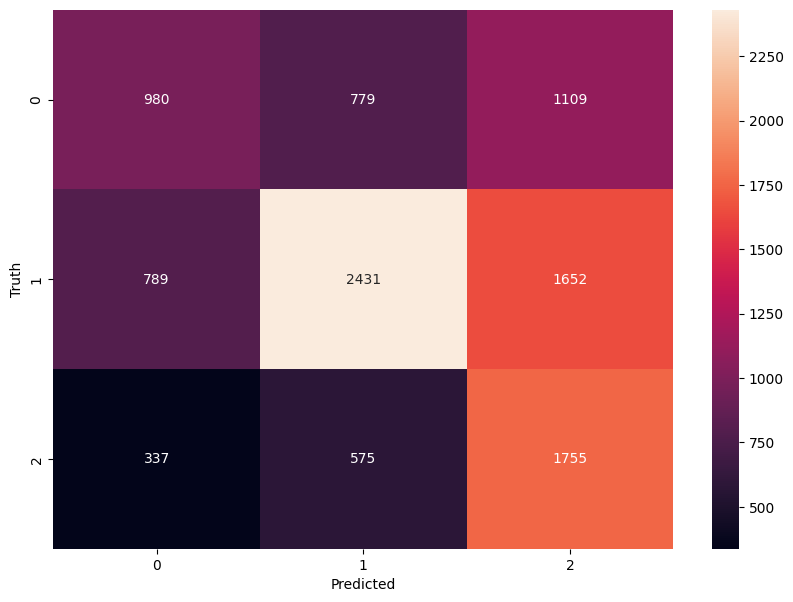

In [158]:
%matplotlib inline
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot = True, fmt = "d")
plt.xlabel("Predicted")
plt.ylabel("Truth")

### Neural Network

In [159]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(solver = "lbfgs", alpha = 1e-5, 
                    hidden_layer_sizes =(128,), random_state=1, max_iter = 1000)
clf.fit(X_train_vec,y_train)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(128,), max_iter=1000,
              random_state=1, solver='lbfgs')

In [160]:
nn_pred = clf.predict(X_test_vec)
print(nn_pred)

[1 0 0 ... 0 0 0]


In [161]:
nnAccuracy = accuracy_score(y_test,nn_pred)
nnFscore = f1_score(y_test,nn_pred,average = "weighted")
print(f"The accuracy of Neutral Network is {nnAccuracy}")
print(f"The F score of Neural Network is {nnFscore}")

The accuracy of Neutral Network is 0.8251177092341693
The F score of Neural Network is 0.82501428417879


## Doing up Machine Learning Models for TextBlob Analysis

In [162]:
X = filterTweets["body"] 
y = filterTweets["blob_polarity"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=0)

### Naive Bayes ML Model

In [163]:
vectoriser = CountVectorizer()

X_train_vec = vectoriser.fit_transform(X_train)
X_test_vec = vectoriser.transform(X_test)

# Train the model using Naive Bayes algorithm
clf = MultinomialNB()
clf.fit(X_train_vec, y_train)

# Make predictions on test data
y_pred = clf.predict(X_test_vec)

# Evaluate the model using accuracy score
metric_report(y_test,y_pred)

Accuracy of Model:0.6640722590564043
Fscore of Model: 0.6413963087106312
Recall of Model: 0.6640722590564043
Precision of Model: 0.6825406578759867


### Create Decision Tree ML Model

In [164]:
clf = DecisionTreeClassifier()
clf.fit(X_train_vec,y_train)

y_pred = clf.predict(X_test_vec)

metric_report(y_test,y_pred)


Accuracy of Model:0.7568943980013453
Fscore of Model: 0.752979397740101
Recall of Model: 0.7568943980013453
Precision of Model: 0.7522345223653073


### Support Vector Machine Model

In [165]:
svm_pred = clf.predict(X_test_vec)

In [166]:

metric_report(y_test,svm_pred)


Accuracy of Model:0.7568943980013453
Fscore of Model: 0.752979397740101
Recall of Model: 0.7568943980013453
Precision of Model: 0.7522345223653073


### Neural Network Model



In [167]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(solver = "lbfgs", alpha = 1e-5, 
                    hidden_layer_sizes =(128,), random_state=1, max_iter = 1000)
clf.fit(X_train_vec,y_train)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(128,), max_iter=1000,
              random_state=1, solver='lbfgs')

In [168]:
nn_pred = clf.predict(X_test_vec)


metric_report(y_test,nn_pred)

Accuracy of Model:0.8896896319784761
Fscore of Model: 0.8888247815766247
Recall of Model: 0.8896896319784761
Precision of Model: 0.8887531331022079
